Feature Selection Using LASSO

In [2]:
from sklearn import datasets
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [4]:
X_train.shape

(614, 8)

In [5]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [6]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [7]:
X_train_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.516591,0.750524,0.564756,1.652015,0.437496,0.795825,0.529526,0.567932
1,1.812018,0.244752,-0.347904,1.020973,-0.678474,1.228654,-0.069689,0.398450
2,0.925736,-0.608739,0.260536,1.273390,0.222886,0.704013,-0.794249,0.991638
3,1.221164,-0.039745,0.463350,-1.250779,-0.678474,-0.896139,-0.167519,2.601722
4,-0.551400,-0.039745,0.361943,1.084077,0.222886,1.031914,-0.760619,-0.364222


In [8]:
from sklearn.linear_model import Lasso
import numpy as np 

lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.01)

In [9]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

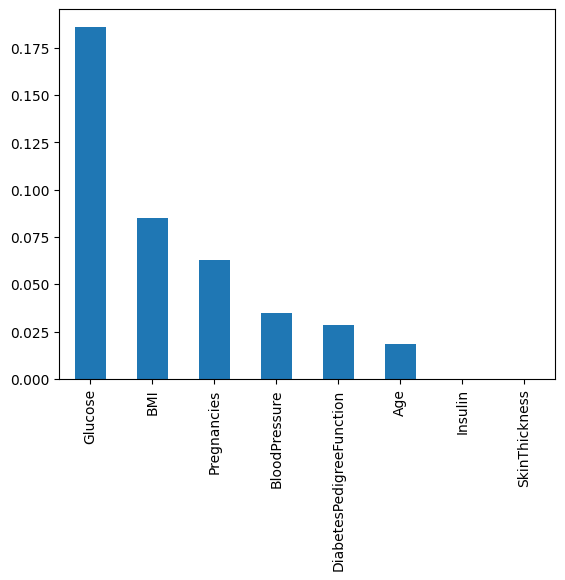

In [13]:
import matplotlib.pyplot as plt
import numpy as np 

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

Feature Selection Using Decision Tree

In [15]:
from sklearn import datasets
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [17]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier()

<Axes: >

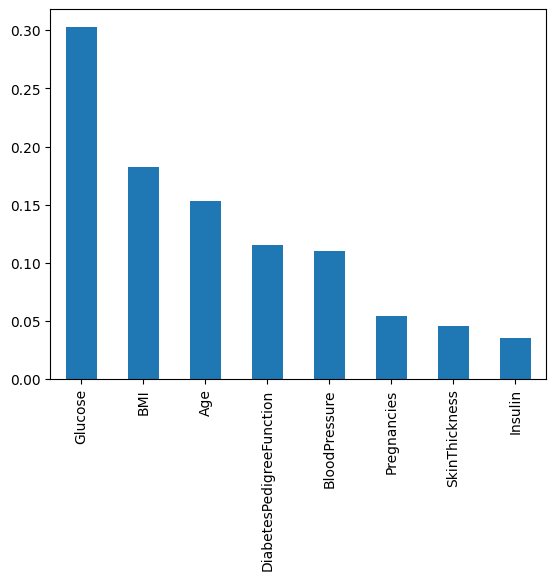

In [19]:
x = pd.Series(np.abs(dt.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

Feature Selection Using Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from pandas.core.common import random_state

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
rf.feature_importances_

array([0.0850013 , 0.24261279, 0.09113318, 0.07549424, 0.0768272 ,
       0.1673974 , 0.12050392, 0.14102998])

<Axes: >

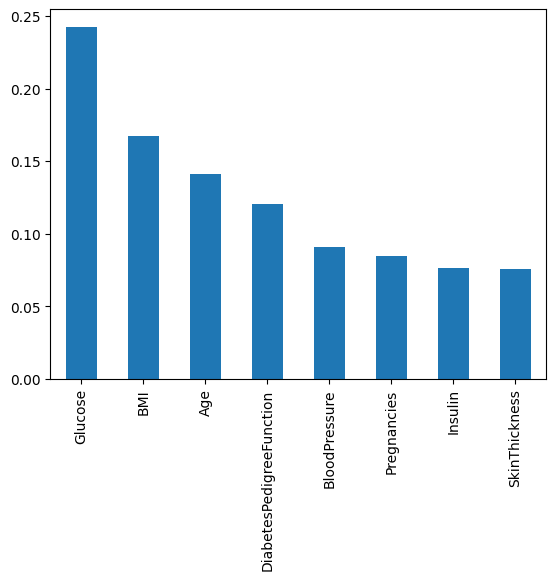

In [23]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

Select From Model

In [24]:
from sklearn import datasets
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [33]:
from sklearn.feature_selection import SelectFromModel 

sfm = SelectFromModel(model,threshold=0.15)

In [34]:
sfm.fit(X_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.15)

In [35]:
sfm.get_support(indices=True)

array([1, 5])

In [36]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI'], dtype=object)

In [37]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI
0,145.0,37.9
1,129.0,41.2
2,102.0,37.2
3,120.0,25.0
4,120.0,39.7
...,...,...
609,157.0,39.4
610,187.0,33.9
611,126.0,43.4
612,171.0,43.6


In [38]:
# if we are not sure or decide the value of threshold then we use this technique

from sklearn.feature_selection import SelectFromModel 

sfm = SelectFromModel(model,threshold='mean')

In [39]:
sfm.fit(X_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold='mean')

In [40]:
sfm.get_support(indices=True)

array([1, 5, 6, 7])

In [41]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [42]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,145.0,37.9,0.637,40.0
1,129.0,41.2,0.441,38.0
2,102.0,37.2,0.204,45.0
3,120.0,25.0,0.409,64.0
4,120.0,39.7,0.215,29.0
...,...,...,...,...
609,157.0,39.4,0.134,30.0
610,187.0,33.9,0.826,34.0
611,126.0,43.4,0.583,42.0
612,171.0,43.6,0.479,26.0


Sklearn RFE

In [2]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset 
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df =pd.read_csv(url)

# separate features and target variable 
x = df.drop('species',axis=1)
y = df['species']

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator = model, n_features_to_select = 1 )

# fit RFE 
rfe.fit(x,y)

# print the ranking
ranking = rfe.ranking_
print('Feature Ranking')

for i, feature in enumerate(x.columns):
  print(f'{feature}:{ranking[i]}')

Feature Ranking
sepal_length:3
sepal_width:4
petal_length:1
petal_width:2


Mutual info

In [3]:
import pandas as pd

data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)


In [5]:
marginal_prob = pd.crosstab(df['A'],df['B'],margins = True , normalize = 'all')
marginal_prob

B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [8]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd 

# load iris dataset 
iris = load_iris()
x = iris['data']
y = iris['target']

# compute mutual information
mi = mutual_info_classif(x,y)

# print mutual information
for i, mi_value in enumerate(mi):
  print(f"Feature {i}: Mutual Information = {mi_value}")

Feature 0: Mutual Information = 0.4889227959102489
Feature 1: Mutual Information = 0.21126478446380914
Feature 2: Mutual Information = 0.9782975614944616
Feature 3: Mutual Information = 0.9994772163808268


In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
